# Tree-based Models

## Classification-tree

* Sequence of if-else questions about indivisual features to infer class labels
* Able to capture non-linear relationships between features and labels
* Don't require feature scaling


<font color ='brown'>**Some Definisions:**</font>
* **Decision-Tree:** data structure consisting of a hierarchy of nodes
* **Node:** a point that involves a question or prediction
    * **Root:** a node where tree starts growing; a question giving rise to *two* children nodes through **branches**, no parent node
    * **Internal node:** *one* parent node, question giving rise to *two* children nodes
    * **Leaf:** *one* parent node, no children nodes >> prediction
    
When an internal node is split, the split is performed in such a way so that **information gain** is maximized. That's how it choses the feature and point to split on. When the information gain resulting from splitting a node is null, the node is declared as a leaf.

<font color='brown'>**Classification Tree Parameters:**</font>

**`DecisionTreeClassifier`**
* **`max_depth`** represents the depth of each tree
* **`random_state`** a seed to inform reproducability
* **`min_samples_leaf`** restriction of the min percentage of training data in the leaf node

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#set plotting style to 'ggplot'
plt.style.use('ggplot')

In [27]:
# to ignore some warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

**Example** You will work with _Wisconsin Breast Cancel Dataset_ in which you'll predict whether a tumor is malignant or benign based on two features: the mean radius of the tumor (`radius_mean`) and its mean number of concave points (`concave points_mean`) 

In [2]:
# Import data
df = pd.read_csv('datasets\wisconsin-breast-cancer.csv')
X = df[['radius_mean','concave points_mean']].values
y = df['diagnosis'].values

In [3]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Split data into 30% test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,
                                                random_state=1,stratify=y)

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=1)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

['B' 'M' 'M' 'B' 'B']


In [4]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_pred, y_test)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.90


<font color='brown'>**Criterions for node split**</font>

1. Entropy
2. Gini index (default)

They produce same accuracy but *gini* tends to be slightly faster to compute

In [5]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion ='entropy', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

# Use dt_entropy to predict test set labels
y_pred= dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_pred, y_test)

# Print accuracy_entropy
print('Accuracy achieved by using entropy: ', accuracy_entropy)

# Print accuracy_gini
print('Accuracy achieved by using the gini index: ', acc)

Accuracy achieved by using entropy:  0.8947368421052632
Accuracy achieved by using the gini index:  0.9005847953216374


## Decision tree for regressiom

Recall that in regression the target variable is continuous.

In the next exercise you will use decision trees to predict the `mpg` value using 6 features as shown below

In [6]:
# Read file
df = pd.read_csv('datasets\mpg.csv')
print(df.head())

df_region = pd.get_dummies(df)

X = df_region.drop('mpg',axis=1).values
y = df_region['mpg'].values

    mpg  displ   hp  weight  accel  origin  size
0  18.0  250.0   88    3139   14.5      US  15.0
1   9.0  304.0  193    4732   18.5      US  20.0
2  36.1   91.0   60    1800   16.4    Asia  10.0
3  18.5  250.0   98    3525   19.0      US  15.0
4  34.3   97.0   78    2188   15.8  Europe  10.0


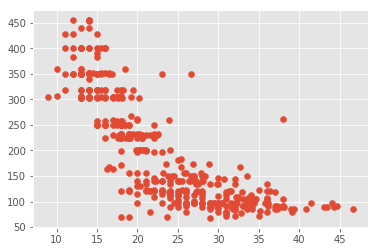

In [7]:
# Plot scatter

plt.scatter(df['mpg'],df['displ'])
plt.show()

You can see that the relationship between these two variables is *non-linear*; therefore, a linear regression model is going to fail modeling and predicting the data.

In [8]:
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Split train and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                random_state=3)

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf=0.13,
            random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_pred, y_test)

# Compute rmse_dt
rmse_dt = np.sqrt(mse_dt)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 4.37


------------
## Generization Error

The very basic idea of machine learning is the find a function $f$ that ralates the features to the label. So we find a model that best approximates $f: \hat{f} \approx f$.

$\hat{f}$ can be any classification/regression model out there. Therefore, the main goal is that the model should achieve low predictive errors on unseen datasets.

You may encounter two difficulties when approximating $\hat{f(x)}$:
* $\hat{f(x)}$ fits training set noise --> **overfitting**
* $\hat{f(x)}$ is not flexible enough to approximate $f$ --> **underfitting**

**Overfitting**
* Low training set error and high test set error

**Underfitting**
* Training set error is roughly equal to test set error, but both errors are high

-----------
**Generization Error** 
it is how much the model generalizes unseen data

$\hat{f(x)} = bias^2 + variance + irreducible \space error$

* **Bias** error term that tells you, on average, how much $\hat{f} \neq f$. High values lead to underfitting
* **Variance** how much $\hat{f}$ in inconsistent over different training sets. High values lead to overfitting
* **Irreducible Error** error of the noise

As the model complexity increases, bias decreases, and variance increases. Thus, you need to chose a complexity that balances bias and variance; therefore, minimizes the generalization error.

So how do we diagnose bais and variance problems??
> use _Cross-Validation (CV)_

Perform the k-fold grid search and get the average error.
* if CV error > training set error --> **hight variance**

To remedy this overfitting, decrease model complexity, or gatter more data

* if CV error $\approx$ training set error >> desired error
To remedy this underfitting, increase model complexity, or gatter more features

In [9]:
# Set SEED for reproducibility
SEED = 1

# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

# Instantiate a DecisionTreeRegressor dt
dt = DecisionTreeRegressor(min_samples_leaf=0.26, max_depth=4, random_state=SEED)

**Evaluate the 10-fold CV error**

In [10]:
from sklearn.model_selection import cross_val_score

# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv=10, 
                       scoring='neg_mean_squared_error',
                       n_jobs=-1)

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**((1/2)) #sqrt

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 5.14


A very good practice is to keep the test set untouched until you are confident about your model's performance. CV is a great technique to get an estimate of a model's performance without affecting the test set.

Now evaluate the **error of the training set**.

In [11]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train,y_pred_train))**((1/2))

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

Train RMSE: 5.15


Notice the training set error and CV error are roughly equal, but they are higher than the test set error achieved in the previous exercise. Thus, the model suffers from high bias (underfitting)

--------------
## Ensemble Learning

Decision Trees (CARTS) have many advantages such as:
* Easy to use
* Easy to interpret their results
* Don't require scaling or a lot of pre-processing
* Model non-linear relationships

On the other hand they have some limitations:
* Sensitive to small variations on training set
* Unconstrianed CARTs may overfit the training set

One solution to reduce these limitations is **Ensemle Learning**. It is main concept is to train different models on the same dataset, aggregate their predictions, and predict the class that gets the most votes (**Voting Classifiers**). This results in a final model that is more robust and less prone to errors.

In the next exercise you will predict weather a patient suffers from liver disease or not based on some features. Notice that the dataset is already pre-processed by standarizing its numerical feature. The original dataset is availabe in the same folder in case you want to work with it instead.

In [46]:
df = pd.read_csv('datasets\indian_liver_patient\indian_liver_patient_preprocessed.csv'
                 ,index_col=0)
df.head()

,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0,1
1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1,1
2,1.062306,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707,1,1
3,0.815511,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780,1,1
4,1.679294,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237,1,1


In [47]:
X = df.drop('Liver_disease',axis=1).values
y = df['Liver_disease'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,
                                                random_state=1)

In [48]:
# Import the classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

# Set seed for reproducibility
SEED=1

# Instantiate lr
lr = LogisticRegression(random_state=SEED)

# Instantiate knn
knn = KNN(n_neighbors=27)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), 
               ('K Nearest Neighbours', knn), 
               ('Classification Tree', dt)]

In [49]:
# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_pred, y_test) 
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Logistic Regression : 0.764
K Nearest Neighbours : 0.701
Classification Tree : 0.730


In [50]:
# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_pred, y_test)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.770


Notice how the voting classifier achieves a test set accuracy of 77.0%. This value is greater than that achieved by LogisticRegression

## Bagging

It stands for **Bootstrap Aggregation**. In bagging only one algorithm is used on different subsets of the training set. Those subsets are obtained by bootstrabbing subsets of the training set with replacement. This reduces variance that leads to over-fitting. The final precition is decided by majority voting in case of classification (`BaggingClassifier`), and by averaging in regression (`Baggingregressor`).

```python
BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)
```
This codes uses bagging with dicision tree classifier consisting of 50 trees

In [54]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1,
                      bootstrap=True, n_jobs=-1)

In [55]:
# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_pred, y_test)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

Test set accuracy of bc: 0.69


## Out-of-Bag Evaluation

Using Bagging classifiers samples, on average, 63% of the training instances. The remaining 37% constitute the **Out-of-Bag (OOB)** instances. The OOB samples are applied to their corresponing bagging, and the OOB score (accuracy for classifiers, R^2 for regressors) is calculated for each bagging using the OOB samples. The final OOB score is the average of all OOB indivual scores.

**`oob_score = True`** inside **`BaggingClassifier`**

In [56]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier


# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, 
            n_estimators=50,
            oob_score=True,
            random_state=1)

In [57]:
# Fit bc to the training set 
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_pred, y_test)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.718, OOB accuracy: 0.686


Test set accuracy and OBB scores are close!

---------
## Random Forests

Another ensemle method that uses Decision Tress as base estimator. Each estimator is trained on a different bootstrap sample having the same size as the training set. 

It introduces further randomization in the training of indivisual trees because only $d$ features are sampled at each node without replacement ($d$ < total number of features). By detault, it is the square root of the total number of features.

* **`RandomForestClassifier`** aggregates prediction using majority voting
* **`RandomForestRegressor`** aggregates prediction using averaging


In the next example, you will predict bike rental demand through different features

In [75]:
df = pd.read_csv('datasets/bike.csv')
df.tail()

,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
1483,19,0,1,0.80,0.49,0.1343,452,14487,8,1,1,0,0
1484,20,0,1,0.80,0.49,0.1343,356,14488,8,1,1,0,0
1485,21,0,1,0.76,0.58,0.1940,303,14489,8,1,1,0,0
1486,22,0,1,0.76,0.58,0.1940,277,14490,8,1,1,0,0
1487,23,0,1,0.74,0.62,0.1045,174,14491,8,1,1,0,0


In [76]:
X = df.drop('cnt',axis=1)
y = df['cnt']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                random_state=2)

In [77]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
            random_state=2) #you can also specify min_sample_leaf
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 

# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test,y_pred)**((1/2))

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 54.49


## Feature Importance

The features that are most predictive according to the `rf` model trained earlier. In a single decision tree, important features are likely to appear closer to the root of the tree, while unimportant features will often appear closer to the leaves (or not at all).

**`rf.feature_importances_`**

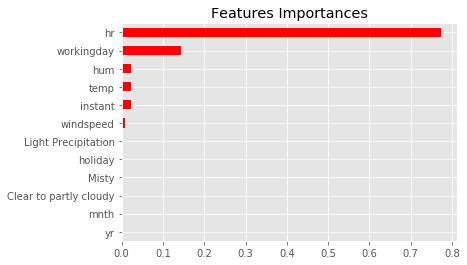

In [80]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='red')
plt.title('Features Importances')
plt.show()

--------------
## AdaBoost

**Boosting** (originally called hypothesis boosting) refers to any Ensemble method that can combine several weak learners into a strong learner. The general idea of most boosting methods is to train predictors sequentially, each trying to correct its predecessor.

**Weak Learning**: Model doing slightly better than random guessing. Ex: Decision tree with max depth = 1

Two main methods of boosting:
1. *AdaBoost*
2. *Gradient Boosting*

**AdaBoost** stands for adaptive boosting.

Each predictor pays more attendtion to the instances wrongly predicted by its predecssor. This is achieved by changing weights of training instances. Depending on the predictor's training error, a coefficienct $\alpha$ is assigned to the predictor. This coefficient will determine the weights of the next training instances, in which wrongly modeled instances will have higher weight so that the next predictor will pay more attention to it. Thus, reducing its error. 

An important parameter  0 < $\eta$ <= 1 called the **Learning Rate** and used to shrink the coefficient $\alpha$. It is important to note that there is a tradeoff between $\alpha$ and the number of estimators.

In the next example you will work on the liver dataset, but this time **ROC AUC** is chosen as the metric (see `sklearn` notebook), and **`.predict_proba()`** is used to find probabilities

In [95]:
df = pd.read_csv('datasets\indian_liver_patient\indian_liver_patient_preprocessed.csv'
                 ,index_col=0)
df.head(3)

,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0,1
1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1,1
2,1.062306,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707,1,1


In [96]:
X = df.drop('Liver_disease',axis=1)
y = df['Liver_disease']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                 stratify=y,
                                                 random_state=1)

In [97]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

# Instantiate ada
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=180, random_state=1)

# Fit ada to the training set
ada.fit(X_train,y_train)

# Compute the probabilities of obtaining the positive class
y_pred_proba = ada.predict_proba(X_test)[:,1]

In [98]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Evaluate test-set roc_auc_score
ada_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

ROC AUC score: 0.71


Not bad! This untuned AdaBoost classifier achieved a ROC AUC score of 0.71!

## Gradient Boosting (GB)

Gradient Boosting works by sequentially adding predictors to an ensemble, each one correcting its predecessor. However, instead of tweaking the instance weights at every iteration like AdaBoost does, this method tries to fit the new predictor to the _residual errors_ as labels made by the previous predictor.

The learning rate $\eta$ also applies here to the residual errors $r$. If you set it to a low value, such as 0.1, you will need more trees in the ensemble to fit the training set, but the predictions will usually generalize better. This is a regularization technique called **shrinkage**.

In [112]:
df = pd.read_csv('datasets/bike.csv')
X = df.drop('cnt',axis=1)
y = df['cnt']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                random_state=2)

In [113]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate gb
gb = GradientBoostingRegressor(max_depth=4, 
            n_estimators=200,
            random_state=2)

# Fit gb to the training set
gb.fit(X_train,y_train)

# Predict test set labels
y_pred = gb.predict(X_test)

In [114]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute MSE
mse_test = MSE(y_test,y_pred)

# Compute RMSE
rmse_test = (mse_test)**(0.5)

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

Test set RMSE of gb: 49.796


## Stochastic Gradient Boosting

Most of the time Gradient Boosting involves exchausting search to find the best split point and feature. Also, the same split point might be used again and possibly the same features.

You can use **Stochastic Gradient Boosting** in which each CART is trained on a random subset of rows of the training data (without replacement). Also, features are sampled (also without replacement) when chosing split points. This adds further diversity, it also adds more variance.

The code is described below:
```python
GradientBoostingRegressor(max_depth=4, 
            subsample=0.9,  # keep at least 90% when subsampling
            max_features=0.75, # max percentage of features to keep when ranomizing
            n_estimators=200,                                
            random_state=2)
```

In [116]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate sgbr
sgbr = GradientBoostingRegressor(max_depth=4, 
            subsample=0.9,
            max_features=0.75,
            n_estimators=200,                                
            random_state=2)

# Fit sgbr to the training set
sgbr.fit(X_train,y_train)

# Predict test set labels
y_pred = sgbr.predict(X_test)

In [117]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute test set MSE
mse_test = MSE(y_pred,y_test)

# Compute test set RMSE
rmse_test = mse_test**(0.5)

# Print rmse_test
print('Test set RMSE of sgbr: {:.3f}'.format(rmse_test))

Test set RMSE of sgbr: 47.944


The stochastic gradient boosting regressor achieves a lower test set RMSE than the gradient boosting regressor

------------
## CART's Hyperparameters Tuning 

**Grid Search** Explained in details in `sklearn` notebook

In [199]:
DecisionTreeClassifier().get_params().keys()

dict_keys(['class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [200]:
df = pd.read_csv('datasets\indian_liver_patient\indian_liver_patient_preprocessed.csv'
                 ,index_col=0)

X = df.drop('Liver_disease',axis=1)
y = df['Liver_disease']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                 stratify=y,
                                                 random_state=1)

In [201]:
# Import roc_auc_score from sklearn.metrics 
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

# Define params_dt
params_dt = {'max_depth':(2,3,4),
             'min_samples_leaf':(0.12,0.14,0.16,0.18)}


# Instantiate grid_dt
grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       scoring='roc_auc',
                       cv=5,
                       n_jobs=-1)

# Fit the CV
grid_dt.fit(X_train,y_train)

# Extract the best estimator
best_model = grid_dt.best_estimator_

# Predict the test set probabilities of the positive class
y_pred_proba = best_model.predict_proba(X_test)[:,1]

# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.614


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## RF's Hyperparameter Tuning

In [202]:
RandomForestRegressor().get_params().keys()

dict_keys(['bootstrap', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [203]:
df = pd.read_csv('datasets/bike.csv')
X = df.drop('cnt',axis=1)
y = df['cnt']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                random_state=2)

In [204]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Initiate the RF model
rf = RandomForestRegressor()

# Define the dictionary 'params_rf'
params_rf = {'n_estimators':(100,350,500),
             'max_features':('log2','auto','sqrt'),
             'min_samples_leaf':(2,10,30)}

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       n_jobs=-1)

# Fit the CV
grid_rf.fit(X_train,y_train)

# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Compute rmse_test
rmse_test = MSE(y_pred,y_test)**(0.5)

# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test)) 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Test RMSE of best model: 54.011


In [205]:
grid_rf.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [206]:
grid_rf.best_params_

{'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 500}